In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Read the dataset into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/Nikkei225.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'].str[:10])

df


,Date,Open,High,Low,Close,Volume
0,2001-01-04,13898.089844,13990.570312,13667.679688,13691.490234,0
1,2001-01-05,13763.219727,13947.059570,13725.459961,13867.610352,0
2,2001-01-06,NaN,NaN,NaN,NaN,0
3,2001-01-07,NaN,NaN,NaN,NaN,0
4,2001-01-08,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
8479,2024-03-23,NaN,NaN,NaN,NaN,0
8480,2024-03-24,NaN,NaN,NaN,NaN,0
8481,2024-03-25,40798.960938,40837.179688,40414.121094,40414.121094,101500000
8482,2024-03-26,40345.039062,40529.531250,40280.851562,40398.031250,101400000


In [4]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Open' column is not NaN
df = df[df['Open'].notna()]

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df



,Date,Open,High,Low,Close,Volume
0,2001-01-04,13898.089844,13990.570312,13667.679688,13691.490234,0
1,2001-01-05,13763.219727,13947.059570,13725.459961,13867.610352,0
2,2001-01-09,13732.849609,13732.849609,13460.820312,13610.509766,0
3,2001-01-10,13593.160156,13593.160156,13349.150391,13432.650391,0
4,2001-01-11,13433.089844,13436.610352,13123.809570,13201.070312,0
...,...,...,...,...,...,...
5684,2024-03-21,40511.550781,40823.320312,40452.191406,40815.660156,157200000
5685,2024-03-22,40942.878906,41087.750000,40714.140625,40888.429688,136100000
5686,2024-03-25,40798.960938,40837.179688,40414.121094,40414.121094,101500000
5687,2024-03-26,40345.039062,40529.531250,40280.851562,40398.031250,101400000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689 entries, 0 to 5688
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5689 non-null   datetime64[ns]
 1   Open    5689 non-null   float64       
 2   High    5689 non-null   float64       
 3   Low     5689 non-null   float64       
 4   Close   5689 non-null   float64       
 5   Volume  5689 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 266.8 KB


In [6]:
df.shape


(5689, 6)

In [7]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of DowJones',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=plot_data, layout=layout)


iplot(plot)

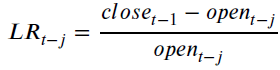

Where,
       


*   t is the orbservation at time 't'
*   𝑗 ∈ {1, 2, 3, 4, 5, 21, 63, 126, 252}
*   LR is the Lagged Returns



In [8]:
def calculate_lagged_returns(df, window_sizes):
    for window_size in window_sizes:

        lagged_returns = (df['Close'].shift(1) - df['Open'].shift(window_size)) / df['Open'].shift(window_size)
        lagged_returns_name = f'LR_{window_size}'
        df[lagged_returns_name] = lagged_returns
    return df


window_sizes = [1, 2, 3, 4, 5, 21, 63, 126, 252]

df_with_lagged_returns = calculate_lagged_returns(df, window_sizes)

df_with_lagged_returns


<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b51

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252
0,2001-01-04,13898.089844,13990.570312,13667.679688,13691.490234,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-05,13763.219727,13947.059570,13725.459961,13867.610352,0,-0.014865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-09,13732.849609,13732.849609,13460.820312,13610.509766,0,0.007585,-0.002193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-10,13593.160156,13593.160156,13349.150391,13432.650391,0,-0.008909,-0.011096,-0.020692,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-11,13433.089844,13436.610352,13123.809570,13201.070312,0,-0.011808,-0.021860,-0.024018,-0.033489,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,2024-03-21,40511.550781,40823.320312,40452.191406,40815.660156,157200000,0.009616,0.026760,0.037756,0.036585,0.024159,0.039773,0.211045,0.226008,0.409308
5685,2024-03-22,40942.878906,41087.750000,40714.140625,40888.429688,136100000,0.007507,0.030111,0.047603,0.058823,0.057627,0.059862,0.245878,0.246573,0.463650
5686,2024-03-25,40798.960938,40837.179688,40414.121094,40414.121094,101500000,-0.001330,0.009303,0.031948,0.049471,0.060710,0.070603,0.247769,0.241845,0.489238
5687,2024-03-26,40345.039062,40529.531250,40280.851562,40398.031250,101400000,-0.009433,-0.012915,-0.002405,0.019977,0.037297,0.049497,0.233107,0.208974,0.473803


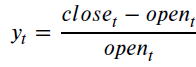

Where,
       


*   t is the orbservation at time 't'
*   y is the Target_variable



In [9]:
# Add the target variable column to the DataFrame

df_with_target_variable = df_with_lagged_returns.copy()
df_with_target_variable['Target_variable'] = (df_with_target_variable['Close'] - df_with_target_variable['Open']) / df_with_target_variable['Open']
df_with_target_variable


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
0,2001-01-04,13898.089844,13990.570312,13667.679688,13691.490234,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.014865
1,2001-01-05,13763.219727,13947.059570,13725.459961,13867.610352,0,-0.014865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007585
2,2001-01-09,13732.849609,13732.849609,13460.820312,13610.509766,0,0.007585,-0.002193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008909
3,2001-01-10,13593.160156,13593.160156,13349.150391,13432.650391,0,-0.008909,-0.011096,-0.020692,NaN,NaN,NaN,NaN,NaN,NaN,-0.011808
4,2001-01-11,13433.089844,13436.610352,13123.809570,13201.070312,0,-0.011808,-0.021860,-0.024018,-0.033489,NaN,NaN,NaN,NaN,NaN,-0.017272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,2024-03-21,40511.550781,40823.320312,40452.191406,40815.660156,157200000,0.009616,0.026760,0.037756,0.036585,0.024159,0.039773,0.211045,0.226008,0.409308,0.007507
5685,2024-03-22,40942.878906,41087.750000,40714.140625,40888.429688,136100000,0.007507,0.030111,0.047603,0.058823,0.057627,0.059862,0.245878,0.246573,0.463650,-0.001330
5686,2024-03-25,40798.960938,40837.179688,40414.121094,40414.121094,101500000,-0.001330,0.009303,0.031948,0.049471,0.060710,0.070603,0.247769,0.241845,0.489238,-0.009433
5687,2024-03-26,40345.039062,40529.531250,40280.851562,40398.031250,101400000,-0.009433,-0.012915,-0.002405,0.019977,0.037297,0.049497,0.233107,0.208974,0.473803,0.001313


In [10]:
df = df_with_target_variable.dropna()
df

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
252,2002-01-15,10359.440430,10359.440430,10208.049805,10208.049805,0,-0.008984,-0.019769,-0.020604,-0.036929,-0.033495,-0.036158,0.029398,-0.143522,-0.248703,-0.014614
253,2002-01-16,10172.160156,10269.030273,10096.339844,10177.580078,0,-0.014614,-0.031150,-0.041693,-0.042509,-0.058469,-0.049186,0.021272,-0.166550,-0.258309,0.000533
254,2002-01-17,10184.950195,10257.450195,10074.450195,10128.179688,0,0.000533,-0.017555,-0.034042,-0.044553,-0.045367,-0.032904,0.010231,-0.164282,-0.258888,-0.005574
255,2002-01-18,10165.160156,10296.790039,10151.429688,10293.320312,0,-0.005574,-0.004324,-0.022324,-0.038730,-0.049191,-0.034498,-0.033049,-0.165240,-0.254906,0.012608
256,2002-01-21,10252.429688,10393.559570,10169.799805,10280.250000,0,0.012608,0.010640,0.011911,-0.006383,-0.023057,-0.039946,-0.023890,-0.171067,-0.233734,0.002714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,2024-03-21,40511.550781,40823.320312,40452.191406,40815.660156,157200000,0.009616,0.026760,0.037756,0.036585,0.024159,0.039773,0.211045,0.226008,0.409308,0.007507
5685,2024-03-22,40942.878906,41087.750000,40714.140625,40888.429688,136100000,0.007507,0.030111,0.047603,0.058823,0.057627,0.059862,0.245878,0.246573,0.463650,-0.001330
5686,2024-03-25,40798.960938,40837.179688,40414.121094,40414.121094,101500000,-0.001330,0.009303,0.031948,0.049471,0.060710,0.070603,0.247769,0.241845,0.489238,-0.009433
5687,2024-03-26,40345.039062,40529.531250,40280.851562,40398.031250,101400000,-0.009433,-0.012915,-0.002405,0.019977,0.037297,0.049497,0.233107,0.208974,0.473803,0.001313


In [11]:
# Calculate the lengths for train, validation, and test sets
total_length = len(df)
train_length = int(total_length * 0.7)
validation_length = int(total_length * 0.15)

# Split the data into training, validation, and test sets
train_set = df.iloc[:train_length]
validation_set = df.iloc[train_length:train_length+validation_length]
test_set = df.iloc[train_length+validation_length:]

x_train = train_set.iloc[:, 6:-1].values
y_train = train_set.iloc[:, -1].values

x_valid = validation_set.iloc[:, 6:-1].values
y_valid = validation_set.iloc[:, -1].values

x_test = test_set.iloc[:, 6:-1].values
y_test = test_set.iloc[:, -1].values



In [12]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape)
print("y_valid: ",y_valid.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)


x_train:  (3805, 9)
y_train:  (3805,)
x_valid:  (815, 9)
y_valid:  (815,)
x_test:  (817, 9)
y_test:  (817,)


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
best_svr = grid_search.best_estimator_

In [15]:
# Print the best hyperparameters found from grid search

print("Best hyperparameters found from grid search:")
print(grid_search.best_params_)

Best hyperparameters found from grid search:
{'C': 10, 'epsilon': 0.01, 'gamma': 0.1}


In [16]:
best_model_path = "best_svr_model.pkl"
joblib.dump((best_svr, grid_search.best_params_), best_model_path)

drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/"

!cp best_svr_model.pkl "{drive_path}"

print(f"Model saved in Google Drive: {drive_path}best_svr_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive: /content/drive/MyDrive/best_svr_model.pkl


In [17]:
# Load best model and its hyperparameters
drive_path = "/content/drive/MyDrive/"

loaded_model_path = drive_path + "best_svr_model.pkl"
best_svr, best_hyperparameters_svr = joblib.load(loaded_model_path)
print("model loaded and stored in variable 'best_svr'")

print("Loaded hyperparameters:")
print(best_hyperparameters_svr)



model loaded and stored in variable 'best_svr'
Loaded hyperparameters:
{'C': 10, 'epsilon': 0.01, 'gamma': 0.1}


In [18]:
# Make predictions
y_train_pred = best_svr.predict(x_train)
y_valid_pred = best_svr.predict(x_valid)
y_test_pred = best_svr.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [19]:
print("Train RMSE (SVR): ",train_rmse)
print("Validation RMSE (SVR): ",valid_rmse)
print("Test RMSE (SVR): ",test_rmse)


Train RMSE (SVR):  0.011341430377912144
Validation RMSE (SVR):  0.008483250913591372
Test RMSE (SVR):  0.007731614934189596


In [20]:
# Add the predicted target variable to the validation set with the new column name

validation_set['Target_prediction'] = y_valid_pred
validation_set


<ipython-input-20-59e6355016a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction
4057,2017-07-20,20046.900391,20157.109375,20032.230469,20144.589844,80800000,0.002508,-0.002668,-0.006799,-0.007752,-0.005778,-0.010540,0.082362,0.067554,0.302090,0.004873,-0.000357
4058,2017-07-21,20089.859375,20135.330078,20081.910156,20099.750000,78700000,0.004873,0.008703,0.003496,-0.000661,-0.001620,-0.002356,0.099156,0.055640,0.262090,0.000492,-0.000719
4059,2017-07-24,19973.669922,20002.539062,19901.880859,19975.669922,81300000,0.000492,0.002636,0.006458,0.001262,-0.002886,-0.002711,0.089631,0.054598,0.229869,0.000100,-0.000640
4060,2017-07-25,19979.560547,20036.310547,19941.609375,19955.199219,70100000,0.000100,-0.005684,-0.003553,0.000245,-0.004919,-0.008779,0.074433,0.054768,0.229862,-0.001219,-0.000613
4061,2017-07-26,20098.140625,20116.000000,20016.580078,20050.160156,85500000,-0.001219,-0.000925,-0.006703,-0.004574,-0.000780,-0.008822,0.056368,0.060464,0.217068,-0.002387,-0.000206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,2020-11-17,26043.449219,26057.300781,25851.539062,26014.619141,84800000,0.009911,0.019731,0.018380,0.030274,0.032671,0.103437,0.110745,0.286311,0.139744,-0.001107,-0.001170
4868,2020-11-18,25860.550781,25882.140625,25656.699219,25728.140625,69200000,-0.001107,0.014109,0.023970,0.022613,0.034557,0.104951,0.121828,0.291062,0.125259,-0.005120,-0.000208
4869,2020-11-19,25628.730469,25650.859375,25474.939453,25634.339844,82000000,-0.005120,-0.012107,0.002941,0.012694,0.011352,0.090736,0.113878,0.280159,0.102154,0.000219,-0.000522
4870,2020-11-20,25486.830078,25555.369141,25425.589844,25527.369141,63400000,0.000219,-0.008747,-0.015709,-0.000715,0.009002,0.085487,0.114637,0.252318,0.100983,0.001591,-0.000323


In [21]:
# Add a new column 'Predicted_close' to validation_set

validation_set['Predicted_close'] = (validation_set['Target_prediction'] * validation_set['Open']) + validation_set['Open']
validation_set


<ipython-input-21-e78b35780010>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
4057,2017-07-20,20046.900391,20157.109375,20032.230469,20144.589844,80800000,0.002508,-0.002668,-0.006799,-0.007752,-0.005778,-0.010540,0.082362,0.067554,0.302090,0.004873,-0.000357,20039.746014
4058,2017-07-21,20089.859375,20135.330078,20081.910156,20099.750000,78700000,0.004873,0.008703,0.003496,-0.000661,-0.001620,-0.002356,0.099156,0.055640,0.262090,0.000492,-0.000719,20075.412498
4059,2017-07-24,19973.669922,20002.539062,19901.880859,19975.669922,81300000,0.000492,0.002636,0.006458,0.001262,-0.002886,-0.002711,0.089631,0.054598,0.229869,0.000100,-0.000640,19960.880642
4060,2017-07-25,19979.560547,20036.310547,19941.609375,19955.199219,70100000,0.000100,-0.005684,-0.003553,0.000245,-0.004919,-0.008779,0.074433,0.054768,0.229862,-0.001219,-0.000613,19967.310493
4061,2017-07-26,20098.140625,20116.000000,20016.580078,20050.160156,85500000,-0.001219,-0.000925,-0.006703,-0.004574,-0.000780,-0.008822,0.056368,0.060464,0.217068,-0.002387,-0.000206,20093.992261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,2020-11-17,26043.449219,26057.300781,25851.539062,26014.619141,84800000,0.009911,0.019731,0.018380,0.030274,0.032671,0.103437,0.110745,0.286311,0.139744,-0.001107,-0.001170,26012.981901
4868,2020-11-18,25860.550781,25882.140625,25656.699219,25728.140625,69200000,-0.001107,0.014109,0.023970,0.022613,0.034557,0.104951,0.121828,0.291062,0.125259,-0.005120,-0.000208,25855.168869
4869,2020-11-19,25628.730469,25650.859375,25474.939453,25634.339844,82000000,-0.005120,-0.012107,0.002941,0.012694,0.011352,0.090736,0.113878,0.280159,0.102154,0.000219,-0.000522,25615.356310
4870,2020-11-20,25486.830078,25555.369141,25425.589844,25527.369141,63400000,0.000219,-0.008747,-0.015709,-0.000715,0.009002,0.085487,0.114637,0.252318,0.100983,0.001591,-0.000323,25478.590724


In [22]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=3ee0fee4dfcf628080b9ff9bbfdc21f3ee195eedacba38f1d1b41e53498921a2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [23]:
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(best_svr, random_state=1)
perm.fit(x_valid, y_valid)
eli5.show_weights(perm, feature_names=['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'])


Weight,Feature
0.0235 ± 0.0125,LR_5
0.0079 ± 0.0071,LR_252
0.0049 ± 0.0014,LR_126
0.0048 ± 0.0019,LR_2
0.0018 ± 0.0056,LR_1
-0.0109 ± 0.0052,LR_63
-0.0112 ± 0.0027,LR_3
-0.0186 ± 0.0036,LR_21
-0.0192 ± 0.0125,LR_4


In [24]:
weights = perm.feature_importances_
feature_names = ['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252']

feature_weights = list(zip(feature_names, weights))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

sorted_feature_names = [feature[0] for feature in sorted_features]

print("Ranked Features based on Permutation Importance:")
print(sorted_feature_names)


Ranked Features based on Permutation Importance:
['LR_5', 'LR_252', 'LR_126', 'LR_2', 'LR_1', 'LR_63', 'LR_3', 'LR_21', 'LR_4']


In [25]:
validation_set_pi=validation_set.copy()
features_to_drop = ['Target_prediction','Predicted_close']
validation_set_pi.drop(features_to_drop, axis=1, inplace=True)

validation_set_pi


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
4057,2017-07-20,20046.900391,20157.109375,20032.230469,20144.589844,80800000,0.002508,-0.002668,-0.006799,-0.007752,-0.005778,-0.010540,0.082362,0.067554,0.302090,0.004873
4058,2017-07-21,20089.859375,20135.330078,20081.910156,20099.750000,78700000,0.004873,0.008703,0.003496,-0.000661,-0.001620,-0.002356,0.099156,0.055640,0.262090,0.000492
4059,2017-07-24,19973.669922,20002.539062,19901.880859,19975.669922,81300000,0.000492,0.002636,0.006458,0.001262,-0.002886,-0.002711,0.089631,0.054598,0.229869,0.000100
4060,2017-07-25,19979.560547,20036.310547,19941.609375,19955.199219,70100000,0.000100,-0.005684,-0.003553,0.000245,-0.004919,-0.008779,0.074433,0.054768,0.229862,-0.001219
4061,2017-07-26,20098.140625,20116.000000,20016.580078,20050.160156,85500000,-0.001219,-0.000925,-0.006703,-0.004574,-0.000780,-0.008822,0.056368,0.060464,0.217068,-0.002387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,2020-11-17,26043.449219,26057.300781,25851.539062,26014.619141,84800000,0.009911,0.019731,0.018380,0.030274,0.032671,0.103437,0.110745,0.286311,0.139744,-0.001107
4868,2020-11-18,25860.550781,25882.140625,25656.699219,25728.140625,69200000,-0.001107,0.014109,0.023970,0.022613,0.034557,0.104951,0.121828,0.291062,0.125259,-0.005120
4869,2020-11-19,25628.730469,25650.859375,25474.939453,25634.339844,82000000,-0.005120,-0.012107,0.002941,0.012694,0.011352,0.090736,0.113878,0.280159,0.102154,0.000219
4870,2020-11-20,25486.830078,25555.369141,25425.589844,25527.369141,63400000,0.000219,-0.008747,-0.015709,-0.000715,0.009002,0.085487,0.114637,0.252318,0.100983,0.001591


In [26]:
x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
y_valid_pi = validation_set_pi.iloc[:, -1].values

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_valid_pi, y_valid_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
# Get the best model from grid search
best_svr_pi = grid_search.best_estimator_


In [29]:
y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

print("Validation RMSE:", valid_rmse_pi)


Validation RMSE: 0.008325884936373875


In [30]:
loss_difference=valid_rmse-valid_rmse_pi
loss_difference

0.00015736597721749748

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

validation_set_pi = validation_set.copy()
validation_set_pi.drop(['Target_prediction', 'Predicted_close'], axis=1, inplace=True)


rmse_dict = {}
features_dropped = []

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr = SVR(kernel='rbf')

for feature in sorted_feature_names[::-1]:

    validation_set_pi.drop([feature], axis=1, inplace=True)

    x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
    y_valid_pi = validation_set_pi.iloc[:, -1].values

    if x_valid_pi.shape[1] > 0:
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(x_valid_pi, y_valid_pi)

        best_svr_pi = grid_search.best_estimator_

        y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

        valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

        feature_names = validation_set_pi.columns[6:-1].tolist()

        rmse_dict[tuple(feature_names)] = valid_rmse_pi

        features_dropped.append(feature)

    else:
        print("No features left to drop. Exiting loop.")
        break

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
No features left to drop. Exiting loop.


In [32]:
print(rmse_dict)

{('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): 0.008326080586285265, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.008319521532263533, ('LR_1', 'LR_2', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.008319929276016321, ('LR_1', 'LR_2', 'LR_5', 'LR_126', 'LR_252'): 0.00832185599259118, ('LR_2', 'LR_5', 'LR_126', 'LR_252'): 0.00832354652324758, ('LR_5', 'LR_126', 'LR_252'): 0.008321595933516283, ('LR_5', 'LR_252'): 0.008326332796146235, ('LR_5',): 0.008335594889033645}


In [33]:
# Convert rmse_dict keys to a list of tuples
feature_combinations = list(rmse_dict.keys())

# Initialize a new dictionary to store the loss differences
rmse_loss_dict = {}

# Iterate over the indices of feature_combinations
for i in range(len(feature_combinations)):
    # Calculate the loss difference
    loss_difference = valid_rmse - rmse_dict[feature_combinations[i]]

    # Store the feature combination and its loss difference in rmse_loss_dict
    rmse_loss_dict[feature_combinations[i]] = loss_difference

print(rmse_loss_dict)


{('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): 0.00015717032730610744, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.0001637293813278387, ('LR_1', 'LR_2', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.00016332163757505104, ('LR_1', 'LR_2', 'LR_5', 'LR_126', 'LR_252'): 0.0001613949210001915, ('LR_2', 'LR_5', 'LR_126', 'LR_252'): 0.0001597043903437921, ('LR_5', 'LR_126', 'LR_252'): 0.00016165498007508945, ('LR_5', 'LR_252'): 0.00015691811744513763, ('LR_5',): 0.00014765602455772686}


In [34]:
# Find the feature combination with the maximum loss difference
max_loss_feature_combination = max(rmse_loss_dict, key=rmse_loss_dict.get)
max_loss_difference = rmse_loss_dict[max_loss_feature_combination]

# Print the results
print("Feature Combination with Maximum Loss Difference:", max_loss_feature_combination)
print("Maximum Loss Difference:", max_loss_difference)


Feature Combination with Maximum Loss Difference: ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63', 'LR_126', 'LR_252')
Maximum Loss Difference: 0.0001637293813278387


In [35]:
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
validation_set.sort_values(by='Date', inplace=True)

# Create a Plotly figure
fig = go.Figure()

# Add actual close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

# Add predicted close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Market Performance (Validation Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',  # Show hover information for both traces
                  template='plotly_white')

# Show the plot
fig.show()


<ipython-input-35-70a4f92b4860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


test_set_pi = test_set.copy()
selected_features = list(max_loss_feature_combination) + ['Target_variable']


test_set_pi = test_set[selected_features]

x_test_pi = test_set_pi.iloc[:, 0:-1].values
y_test_pi = test_set_pi.iloc[:, -1].values


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_test_pi, y_test_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
best_svr_pi_test = grid_search.best_estimator_

y_test_pred_pi = best_svr_pi_test.predict(x_test_pi)

test_rmse_pi = np.sqrt(mean_squared_error(y_test_pi, y_test_pred_pi))

print("Test RMSE:", test_rmse_pi)



Test RMSE: 0.007694419764547232


In [38]:
test_set['Target_prediction'] = y_test_pred

test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']

test_set


<ipython-input-38-1e80d68ee31b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-1e80d68ee31b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
4872,2020-11-25,26468.519531,26706.419922,26258.349609,26296.859375,92500000,0.010198,0.026632,0.020948,0.011796,0.004690,0.110655,0.136510,0.264491,0.117131,-0.006485,-0.001466,26429.706254
4873,2020-11-26,26255.470703,26560.029297,26255.470703,26537.310547,63500000,-0.006485,0.015266,0.031782,0.026070,0.016872,0.118027,0.147673,0.277542,0.126862,0.010735,-0.000449,26243.675486
4874,2020-11-27,26530.279297,26672.400391,26419.050781,26644.710938,86200000,0.010735,0.002599,0.024549,0.041217,0.035452,0.135191,0.141746,0.284888,0.132174,0.004313,-0.001099,26501.120934
4875,2020-11-30,26830.099609,26834.199219,26405.830078,26433.619141,147700000,0.004313,0.014825,0.006657,0.028696,0.045431,0.139997,0.145662,0.273163,0.142300,-0.014777,0.000206,26835.637366
4876,2020-12-01,26624.199219,26852.160156,26618.390625,26787.539062,73200000,-0.014777,-0.003643,0.006785,-0.001319,0.020546,0.140818,0.133953,0.243975,0.141322,0.006135,0.001292,26658.599769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,2024-03-21,40511.550781,40823.320312,40452.191406,40815.660156,157200000,0.009616,0.026760,0.037756,0.036585,0.024159,0.039773,0.211045,0.226008,0.409308,0.007507,-0.001717,40442.005921
5685,2024-03-22,40942.878906,41087.750000,40714.140625,40888.429688,136100000,0.007507,0.030111,0.047603,0.058823,0.057627,0.059862,0.245878,0.246573,0.463650,-0.001330,-0.001074,40898.902875
5686,2024-03-25,40798.960938,40837.179688,40414.121094,40414.121094,101500000,-0.001330,0.009303,0.031948,0.049471,0.060710,0.070603,0.247769,0.241845,0.489238,-0.009433,0.000151,40805.132691
5687,2024-03-26,40345.039062,40529.531250,40280.851562,40398.031250,101400000,-0.009433,-0.012915,-0.002405,0.019977,0.037297,0.049497,0.233107,0.208974,0.473803,0.001313,0.000831,40378.563117


In [39]:
import plotly.graph_objects as go

test_set.sort_values(by='Date', inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

fig.update_layout(title='Stock Market Performance (Test Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


<ipython-input-39-8169664d4a58>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
test_set['Target_prediction'] = y_test_pred
test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']
test_set

<ipython-input-40-dc11733f5df5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-dc11733f5df5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
4872,2020-11-25,26468.519531,26706.419922,26258.349609,26296.859375,92500000,0.010198,0.026632,0.020948,0.011796,0.004690,0.110655,0.136510,0.264491,0.117131,-0.006485,-0.001466,26429.706254
4873,2020-11-26,26255.470703,26560.029297,26255.470703,26537.310547,63500000,-0.006485,0.015266,0.031782,0.026070,0.016872,0.118027,0.147673,0.277542,0.126862,0.010735,-0.000449,26243.675486
4874,2020-11-27,26530.279297,26672.400391,26419.050781,26644.710938,86200000,0.010735,0.002599,0.024549,0.041217,0.035452,0.135191,0.141746,0.284888,0.132174,0.004313,-0.001099,26501.120934
4875,2020-11-30,26830.099609,26834.199219,26405.830078,26433.619141,147700000,0.004313,0.014825,0.006657,0.028696,0.045431,0.139997,0.145662,0.273163,0.142300,-0.014777,0.000206,26835.637366
4876,2020-12-01,26624.199219,26852.160156,26618.390625,26787.539062,73200000,-0.014777,-0.003643,0.006785,-0.001319,0.020546,0.140818,0.133953,0.243975,0.141322,0.006135,0.001292,26658.599769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,2024-03-21,40511.550781,40823.320312,40452.191406,40815.660156,157200000,0.009616,0.026760,0.037756,0.036585,0.024159,0.039773,0.211045,0.226008,0.409308,0.007507,-0.001717,40442.005921
5685,2024-03-22,40942.878906,41087.750000,40714.140625,40888.429688,136100000,0.007507,0.030111,0.047603,0.058823,0.057627,0.059862,0.245878,0.246573,0.463650,-0.001330,-0.001074,40898.902875
5686,2024-03-25,40798.960938,40837.179688,40414.121094,40414.121094,101500000,-0.001330,0.009303,0.031948,0.049471,0.060710,0.070603,0.247769,0.241845,0.489238,-0.009433,0.000151,40805.132691
5687,2024-03-26,40345.039062,40529.531250,40280.851562,40398.031250,101400000,-0.009433,-0.012915,-0.002405,0.019977,0.037297,0.049497,0.233107,0.208974,0.473803,0.001313,0.000831,40378.563117


In [41]:
import pandas as pd

combined_df = pd.concat([train_set, validation_set, test_set], axis=0)

combined_df.reset_index(drop=True, inplace=True)

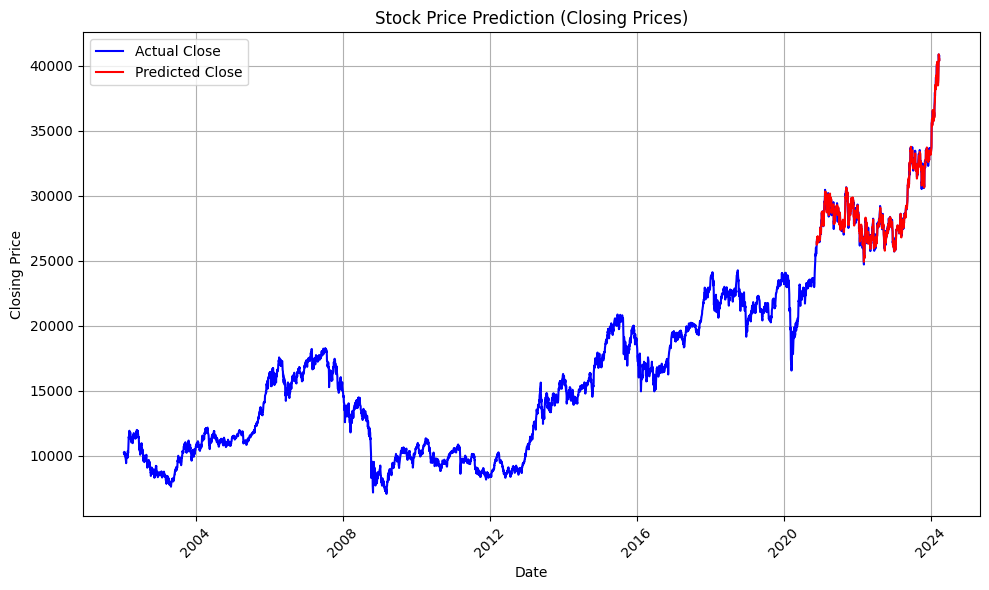

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'],combined_df['Close'] , label='Actual Close', color='blue')
plt.plot(test_set['Date'],test_set['Predicted_close'] , label='Predicted Close', color='red')

plt.title('Stock Price Prediction (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Datasets to carry out the rest of the study (15-20 Datasets)

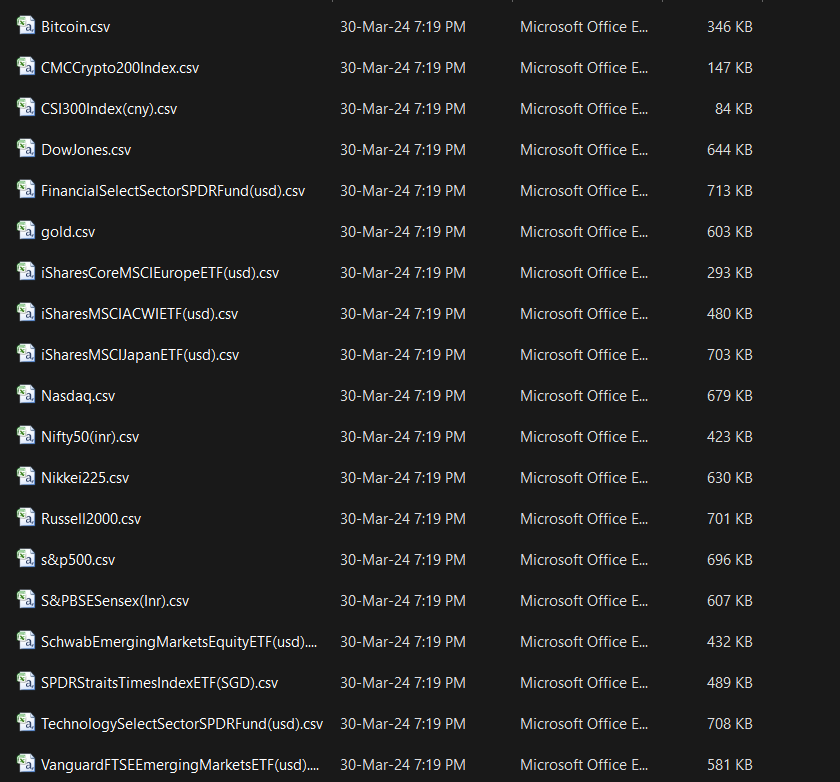

## Other Machine Learning models to experimentation   (4 Models)


*   Gradient Boosting Decision Tree
*   XGBoost
*   Random Forest





In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for GridSearchCV
param_grid_gbdt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GBDT model
gbdt = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbdt.fit(x_train, y_train)

# Get the best model from grid search
best_gbdt = grid_search_gbdt.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for GBDT:")
print(grid_search_gbdt.best_params_)

# Make predictions
y_train_pred_gbdt = best_gbdt.predict(x_train)
y_valid_pred_gbdt = best_gbdt.predict(x_valid)
y_test_pred_gbdt = best_gbdt.predict(x_test)

# Evaluate the model
train_rmse_gbdt = np.sqrt(mean_squared_error(y_train, y_train_pred_gbdt))
valid_rmse_gbdt = np.sqrt(mean_squared_error(y_valid, y_valid_pred_gbdt))
test_rmse_gbdt = np.sqrt(mean_squared_error(y_test, y_test_pred_gbdt))

print("Train RMSE (GBDT):", train_rmse_gbdt)
print("Validation RMSE (GBDT):", valid_rmse_gbdt)
print("Test RMSE (GBDT):", test_rmse_gbdt)

# Plotting

# Visualization for GBDT predictions
# Use the same approach as you did for SVR to visualize GBDT predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for GBDT:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (GBDT): 0.011144692730701069
Validation RMSE (GBDT): 0.008355222042193815
Test RMSE (GBDT): 0.0077019712085142815


In [44]:
import xgboost as xgb

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create XGBoost model
xgboost = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions
y_train_pred_xgb = best_xgb.predict(x_train)
y_valid_pred_xgb = best_xgb.predict(x_valid)
y_test_pred_xgb = best_xgb.predict(x_test)

# Evaluate the model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
valid_rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Validation RMSE (XGBoost):", valid_rmse_xgb)
print("Test RMSE (XGBoost):", test_rmse_xgb)

# Plotting

# Visualization for XGBoost predictions
# Use the same approach as you did for SVR to visualize XGBoost predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for XGBoost:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (XGBoost): 0.011155767678136582
Validation RMSE (XGBoost): 0.008409927433042483
Test RMSE (XGBoost): 0.007704740761453879


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Create Random Forest model
random_forest = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions
y_train_pred_rf = best_rf.predict(x_train)
y_valid_pred_rf = best_rf.predict(x_valid)
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_valid, y_valid_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Train RMSE (Random Forest):", train_rmse_rf)
print("Validation RMSE (Random Forest):", valid_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)

# Plotting

# Visualization for Random Forest predictions
# Use the same approach as you did for SVR to visualize Random Forest predictions.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
Train RMSE (Random Forest): 0.01001181469811394
Validation RMSE (Random Forest): 0.008583538615023464
Test RMSE (Random Forest): 0.007719206585434312
